# **Nama : Marcel Kurniawan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path_aapl = "/content/drive/MyDrive/UAS_DeepLearning/AAPL.csv"
path_amd = "/content/drive/MyDrive/UAS_DeepLearning/AMD.csv"

In [ ]:
aapl = pd.read_csv(path_aapl,parse_dates=['Date'],index_col=['Date'])
amd = pd.read_csv(path_amd,parse_dates=['Date'],index_col=['Date'])

# **1a. Explorasi, praproses data dan splitting data**

## **Explorasi Data**

Pada tahap ini saya melakukan beberapa eksplorasi untuk menemukan problem dari data ini yang nantinya akan dilakukan praproses data setelahnya.

In [ ]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


### **Dimensi dataset**

In [ ]:
aapl.shape

(9909, 6)

In [ ]:
amd.shape

(10098, 6)

Dataset Apple memiliki observasi 9909 dengan kolom sebanyak 7

Dataset AMD memiliki observasi 10098 dengan kolom sebanyak 7

In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB


In [ ]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


Dataset Apple dan AMD ini sama-sama memiliki 6 fitur dan terdiri dari 5 fload dan 1 integer. Fitur pada dataset ini sudah memiliki tipe data yang sesuai.

In [ ]:
miss_aapl = aapl.isnull().sum()
print("Missing value in Apple stock dataframe:", miss_aapl)

Missing value in Apple stock dataframe: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
miss_amd = amd.isnull().sum()
print("Missing value in AMD stock dataframe:", miss_amd)

Missing value in AMD stock dataframe: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Pada dataset Apple dan AMD tidak terdapat missing value.

In [ ]:
duplicated_aapl = aapl.duplicated().sum()
print("Duplicated value in Apple stock dataframe:", duplicated_aapl)

Duplicated value in Apple stock dataframe: 0


In [ ]:
duplicated_amd = amd.duplicated().sum()
print("Duplicated value in AMD stock dataframe:", duplicated_amd)

Duplicated value in AMD stock dataframe: 0


Pada datase Apple dan AMD tidak terdapat duplicated value.

In [ ]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [ ]:
amd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


Berikut adalah ringkasan statistik untuk masing-masing dataset

Tidak terdapat problem pada data ini

## **Praposes Data**

Pada tahap praposes ini, fitur yang akan dipertahankan hanyalah Date dan Close sehingga fitur sisanya tidak digunakan.

In [ ]:
aapl_price=pd.DataFrame(aapl['Close']).rename(columns={'Close':'Price'})
aapl_price.head(5)

,Price
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [ ]:
amd_price=pd.DataFrame(amd['Close']).rename(columns={'Close':'Price'})
amd_price.head(5)

,Price
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


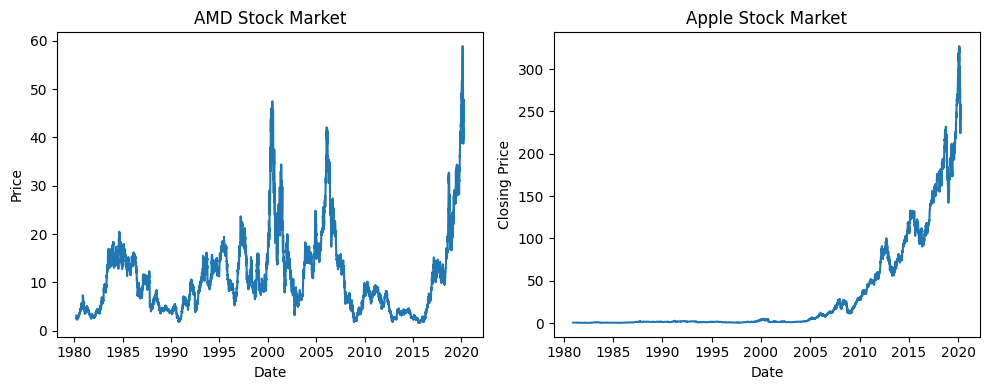

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot for AMD
ax1.plot(amd_price['Price'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('AMD Stock Market')

# Plot for Apple
ax2.plot(aapl_price['Price'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Closing Price')
ax2.set_title('Apple Stock Market')

plt.tight_layout()
plt.show()

Berikut adalah line chart yang menunjukan perubahan harga saham Apple dan AMD dalam kurun waktu 1980 hingga 2020

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = ["Price"]
aapl_price[scaled_data] = scaler.fit_transform(aapl_price[scaled_data])
aapl_price.head(5)

,Price
Date,
1980-12-12,0.000969
1980-12-15,0.000887
1980-12-16,0.000778
1980-12-17,0.000812
1980-12-18,0.000853


In [ ]:
scaler = MinMaxScaler()

scaled_data = ["Price"]
amd_price[scaled_data] = scaler.fit_transform(amd_price[scaled_data])
amd_price.head(5)

,Price
Date,
1980-03-17,0.026638
1980-03-18,0.024638
1980-03-19,0.024820
1980-03-20,0.024274
1980-03-21,0.022637


Pada bagian praproses data saya juga melakukan scaling pada dataset Apple dan AMD, alasanya karena LSTM merupakan algoritma yang berbasis gradien sehingga dengan dilakukanya scaling dapat membantu dalam mempercepat konvergensi. Dengan skala yang serupa, model LSTM lebih mungkin untuk mencapai hasil yang optimal lebih cepat.

## **Pisahkan data time series tersebut menjadi dua bagian input dan output**

In [ ]:
import torch

def create_dataset(dataset, window, horizon):
    X, y = [], []
    for i in range(len(dataset) - window - horizon + 1):
        feature = dataset[i:i+window]
        target = dataset[i+window:i+window+horizon]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

window = 5
horizon = 1

Fungsi diatas memungkinkan kita untuk membagi data timeseries kedalam dua bagian yaitu inpu dan output. Parameter window menentukan jumlah waktu (observasi) yang digunakan sebagai fitur atau input untuk memprediksi nilai target di masa depan. Sedangkan parameter horizon menentukan jumlah waktu ke depan yang ingin diprediksi oleh model.

## **Pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)**

Sebelum split data ini dilakukan data dibagi terlebih dahulu membuat data berdasarkan timestepnya, karena data timeseries bergantung pada timestep.

### **Splitting untuk dataset Apple**

In [ ]:
time_step_aapl=aapl_price.index.to_numpy()
price=aapl_price['Price'].values.astype('float32')
time_step_aapl[:10],price[:10]

(array(['1980-12-12T00:00:00.000000000', '1980-12-15T00:00:00.000000000',
        '1980-12-16T00:00:00.000000000', '1980-12-17T00:00:00.000000000',
        '1980-12-18T00:00:00.000000000', '1980-12-19T00:00:00.000000000',
        '1980-12-22T00:00:00.000000000', '1980-12-23T00:00:00.000000000',
        '1980-12-24T00:00:00.000000000', '1980-12-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.0009693 , 0.00088739, 0.00077817, 0.0008123 , 0.00085326,
        0.00094199, 0.00101708, 0.00108534, 0.00117408, 0.00133791],
       dtype=float32))

In [ ]:
split_size=int(0.8*len(price))
print(split_size)
split_size_val=int(0.1*len(price))
print(split_size_val)

7927
990


In [ ]:
aapl_train_time,aapl_train_price=time_step_aapl[:split_size],price[:split_size]
aapl_val_time,aapl_val_price=time_step_aapl[split_size-1:split_size+split_size_val],price[split_size-1:split_size+split_size_val]
aapl_test_time,aapl_test_price=time_step_aapl[split_size+split_size_val+1:],price[split_size+split_size_val+1:]
len(aapl_train_time),len(aapl_val_time),len(aapl_test_time),len(aapl_train_price),len(aapl_val_price),len(aapl_test_price)

(7927, 991, 991, 7927, 991, 991)

In [ ]:
print("Total Training Length:", len(aapl_train_time)+len(aapl_test_time)+len(aapl_val_time))

Total Training Length: 9909


In [ ]:
aapl_train_time[0:10]

array(['1980-12-12T00:00:00.000000000', '1980-12-15T00:00:00.000000000',
       '1980-12-16T00:00:00.000000000', '1980-12-17T00:00:00.000000000',
       '1980-12-18T00:00:00.000000000', '1980-12-19T00:00:00.000000000',
       '1980-12-22T00:00:00.000000000', '1980-12-23T00:00:00.000000000',
       '1980-12-24T00:00:00.000000000', '1980-12-26T00:00:00.000000000'],
      dtype='datetime64[ns]')

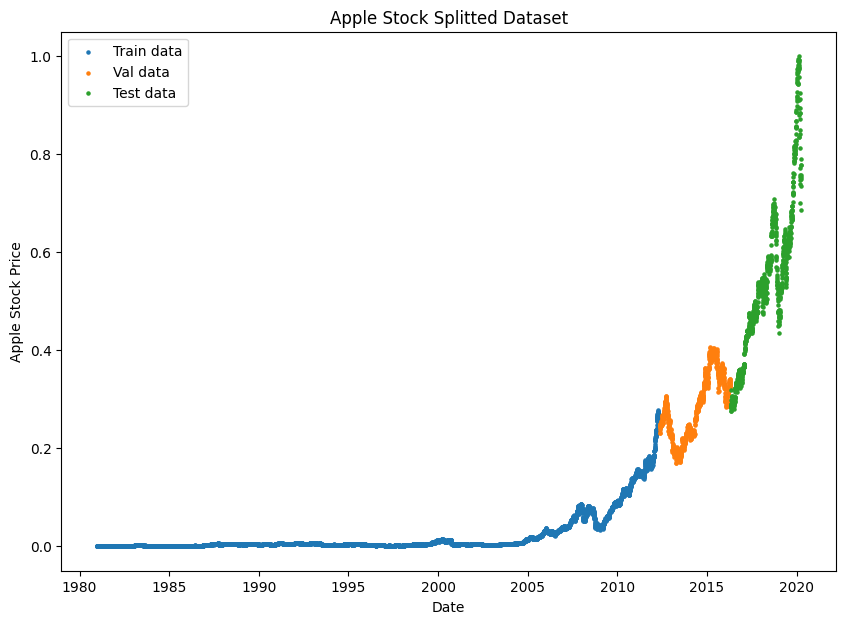

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(aapl_train_time, aapl_train_price, s=5, label="Train data")
plt.scatter(aapl_val_time, aapl_val_price, s=5, label="Val data")
plt.scatter(aapl_test_time, aapl_test_price, s=5, label="Test data")
plt.title('Apple Stock Splitted Dataset')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
Xapl_train, yapl_train = create_dataset(aapl_train_price, window=window, horizon=horizon)
Xapl_val, yapl_val = create_dataset(aapl_val_price, window=window, horizon=horizon)
Xapl_test, yapl_test = create_dataset(aapl_test_price, window=window, horizon=horizon)

print(Xapl_train.shape, yapl_train.shape)
print(Xapl_val.shape, yapl_val.shape)
print(Xapl_test.shape, yapl_test.shape)

torch.Size([7922, 5]) torch.Size([7922, 1])
torch.Size([986, 5]) torch.Size([986, 1])
torch.Size([986, 5]) torch.Size([986, 1])


Dataset Apple sudah terbagi menjadi tiga bagian yaitu Training, Validation dan Testing

### **Splitting untuk dataset AMD**

In [ ]:
time_step_amd=amd_price.index.to_numpy()
price=amd_price['Price'].values.astype('float32')
time_step_amd[:10],price[:10]

(array(['1980-03-17T00:00:00.000000000', '1980-03-18T00:00:00.000000000',
        '1980-03-19T00:00:00.000000000', '1980-03-20T00:00:00.000000000',
        '1980-03-21T00:00:00.000000000', '1980-03-24T00:00:00.000000000',
        '1980-03-25T00:00:00.000000000', '1980-03-26T00:00:00.000000000',
        '1980-03-27T00:00:00.000000000', '1980-03-28T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.02663815, 0.02463774, 0.0248196 , 0.02427403, 0.02263734,
        0.01827281, 0.01718168, 0.01445385, 0.01318087, 0.01609055],
       dtype=float32))

In [ ]:
split_size=int(0.8*len(price))
print(split_size)
split_size_val=int(0.1*len(price))
print(split_size_val)

8078
1009


In [ ]:
amd_train_time,amd_train_price=time_step_amd[:split_size],price[:split_size]
amd_val_time,amd_val_price=time_step_amd[split_size-1:split_size+split_size_val],price[split_size-1:split_size+split_size_val]
amd_test_time,amd_test_price=time_step_amd[split_size+split_size_val+1:],price[split_size+split_size_val+1:]
len(amd_train_time),len(amd_val_time),len(amd_test_time),len(amd_train_price),len(amd_val_price),len(amd_test_price)

(8078, 1010, 1010, 8078, 1010, 1010)

In [ ]:
print("Total Training Length:", len(amd_train_time)+len(amd_val_time)+len(amd_test_time))

Total Training Length: 10098


In [ ]:
amd_train_time[0:10]

array(['1980-03-17T00:00:00.000000000', '1980-03-18T00:00:00.000000000',
       '1980-03-19T00:00:00.000000000', '1980-03-20T00:00:00.000000000',
       '1980-03-21T00:00:00.000000000', '1980-03-24T00:00:00.000000000',
       '1980-03-25T00:00:00.000000000', '1980-03-26T00:00:00.000000000',
       '1980-03-27T00:00:00.000000000', '1980-03-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

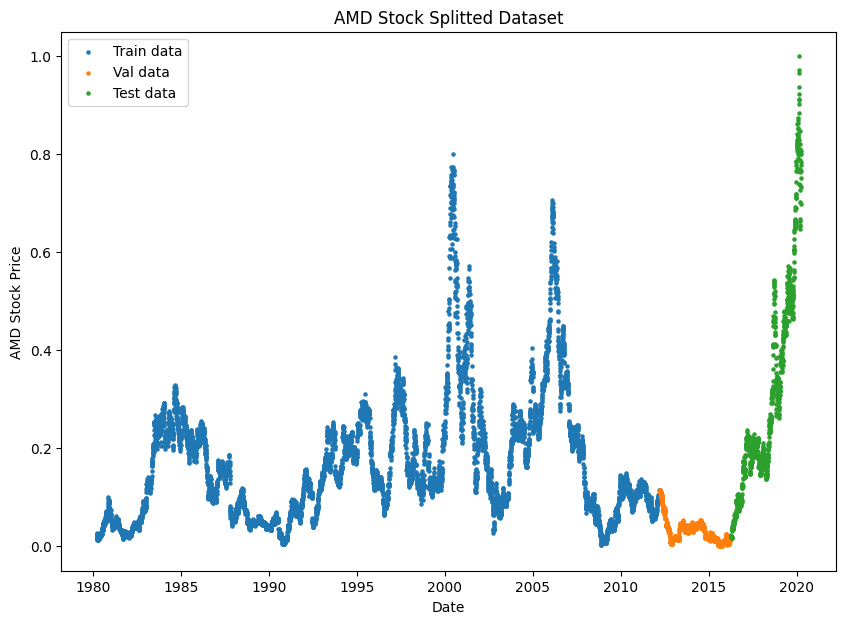

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(amd_train_time, amd_train_price, s=5, label="Train data")
plt.scatter(amd_val_time, amd_val_price, s=5, label="Val data")
plt.scatter(amd_test_time, amd_test_price, s=5, label="Test data")
plt.title('AMD Stock Splitted Dataset')
plt.xlabel('Date')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

In [ ]:
Xamd_train, yamd_train = create_dataset(amd_train_price, window=window, horizon=horizon)
Xamd_val, yamd_val = create_dataset(amd_val_price, window=window, horizon=horizon)
Xamd_test, yamd_test = create_dataset(amd_test_price, window=window, horizon=horizon)

print(Xamd_train.shape, yamd_train.shape)
print(Xamd_val.shape, yamd_val.shape)
print(Xamd_test.shape, yamd_test.shape)

torch.Size([8073, 5]) torch.Size([8073, 1])
torch.Size([1005, 5]) torch.Size([1005, 1])
torch.Size([1005, 5]) torch.Size([1005, 1])


Dataset AMD sudah terbagi menjadi tiga bagian yaitu Training, Validation dan Testing

# **1b. Arsitektur Baseline**

In [ ]:
import torch.nn as nn

class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=50, num_layers=1, batch_first=True)
        self.relu = nn.ReLU()
        self.perceptron = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.relu(x)
        x = self.perceptron(x)
        return x

Arsitektur baseline yang saya buat sesuai dengan kriteria soal dimana terdapat LSTM (units=50) dan layer akhir berupa
node Perceptron dengan units=1 serta Activation function untuk LSTM menggunakan ReLU.

**Model baseline ketika diterapkan pada dataset Apple**


In [ ]:
import torch.optim as optim
import torch.utils.data as data

modelBase = Baseline()
optimizer = optim.SGD(modelBase.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(Xapl_train, yapl_train), shuffle=True)

n_epochs = 6
for epoch in range(n_epochs):
    modelBase.train()
    for X_batch, y_batch in loader:
        y_pred = modelBase(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = modelBase(Xapl_train)
        train_rmse = np.sqrt(loss_fn(y_pred, yapl_train))
        y_pred = modelBase(Xapl_val)
        val_rmse = np.sqrt(loss_fn(y_pred, yapl_val))
    print("Epoch %d: train RMSE %.4f, val RMSE %.4f" % (epoch, train_rmse, val_rmse))

Epoch 0: train RMSE 0.0420, val RMSE 0.2652
Epoch 1: train RMSE 0.0418, val RMSE 0.2637
Epoch 2: train RMSE 0.0417, val RMSE 0.2639
Epoch 3: train RMSE 0.0414, val RMSE 0.2607
Epoch 4: train RMSE 0.0413, val RMSE 0.2585
Epoch 5: train RMSE 0.0411, val RMSE 0.2578


Pada training set nilai RMSE masih menunjukan nilai yang cukup baik, namun pada validation set performa yang dihasikan cukup jauh.

**Model baseline ketika diterapkan pada dataset AMD**

In [ ]:
modelBase = Baseline()
optimizer = optim.SGD(modelBase.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(Xamd_train, yamd_train), shuffle=True)

n_epochs = 6
for epoch in range(n_epochs):
    modelBase.train()
    for X_batch, y_batch in loader:
        y_pred = modelBase(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = modelBase(Xamd_train)
        train_rmse = np.sqrt(loss_fn(y_pred, yamd_train))
        y_pred = modelBase(Xamd_val)
        val_rmse = np.sqrt(loss_fn(y_pred, yamd_val))
    print("Epoch %d: train RMSE %.4f, val RMSE %.4f" % (epoch, train_rmse, val_rmse))

Epoch 0: train RMSE 0.1231, val RMSE 0.1729
Epoch 1: train RMSE 0.1173, val RMSE 0.1668
Epoch 2: train RMSE 0.1136, val RMSE 0.1653
Epoch 3: train RMSE 0.1045, val RMSE 0.1525
Epoch 4: train RMSE 0.1007, val RMSE 0.1489
Epoch 5: train RMSE 0.0959, val RMSE 0.1412


Pada training set maupun validation set sama-sama menunjukan nilai yang tidak terlalu jauh yaitu di rentan 0.1

Secara keseluruhan performa model jika ditinjau melalui nilai RMSE, model ini tidak terlalu buruk ketika diterapkan pada dataset Apple maupun AMD, oleh karena itu untuk meningkatkan performa model ini akan dilakukan modifikasi dan tuning terhadap arsitektur baseline diatas.

# **1c. Modifikasi Arsitektur Baseline LSTM**

Pada bagian ini, saya hanya melakukan sedikit tuning pada beberapa hyperparameter dan optimizer saja dikarenakan model sudah menunjukan performa yang baik.

Alasan saya tidak merubah arsitektur ini karena ketika saya melakukan tuning terhadap hal-hal tersebut, performa yang cukup baik sudah saya dapatkan sehingga saya memilih untuk tidak menambahkan layer apapun kedalam arsitektur ini.

Tuning dan alasanya:

*   Saya merubah optimizer dari SGD menjadi adam, karena dataset yang diolah cukup besar serta memberikan konvergensi yang lebih cepat dan lebih stabil dibandingkan dengan SGD
*   Saya melakukan tuning terhadap learning rate dari 0.001 (default) menjadi 0.01
*   Saya menambahkan batch size sebesar 64 agar dapat mengurangi waktu training yang dibutuhkan serta mengoptimalkan penggunaan sumber daya
*   Saya menambahkan epochnya menjadi 20 untuk menemukan titik optimal dalam proses training.







In [ ]:
import torch.nn as nn

class Modification(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=50, num_layers=1, batch_first=True)
        self.relu = nn.ReLU()
        self.perceptron = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.relu(x)
        x = self.perceptron(x)
        return x

In [ ]:
import torch.optim as optim
import torch.utils.data as data

modelTune = Modification()
optimizer = optim.Adam(modelTune.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(Xapl_train, yapl_train), shuffle=True, batch_size = 64)

n_epochs = 20
for epoch in range(n_epochs):
    modelTune.train()
    for X_batch, y_batch in loader:
        y_pred = modelTune(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = modelTune(Xapl_train)
        train_rmse = np.sqrt(loss_fn(y_pred, yapl_train))
        y_pred = modelTune(Xapl_val)
        val_rmse = np.sqrt(loss_fn(y_pred, yapl_val))
    print("Epoch %d: train RMSE %.4f, val RMSE %.4f" % (epoch, train_rmse, val_rmse))

Epoch 0: train RMSE 0.0019, val RMSE 0.0220
Epoch 1: train RMSE 0.0015, val RMSE 0.0135
Epoch 2: train RMSE 0.0015, val RMSE 0.0116
Epoch 3: train RMSE 0.0016, val RMSE 0.0099
Epoch 4: train RMSE 0.0018, val RMSE 0.0079
Epoch 5: train RMSE 0.0019, val RMSE 0.0186
Epoch 6: train RMSE 0.0013, val RMSE 0.0085
Epoch 7: train RMSE 0.0015, val RMSE 0.0115
Epoch 8: train RMSE 0.0013, val RMSE 0.0080
Epoch 9: train RMSE 0.0015, val RMSE 0.0081
Epoch 10: train RMSE 0.0013, val RMSE 0.0067
Epoch 11: train RMSE 0.0014, val RMSE 0.0069
Epoch 12: train RMSE 0.0022, val RMSE 0.0076
Epoch 13: train RMSE 0.0015, val RMSE 0.0086
Epoch 14: train RMSE 0.0022, val RMSE 0.0095
Epoch 15: train RMSE 0.0013, val RMSE 0.0079
Epoch 16: train RMSE 0.0020, val RMSE 0.0083
Epoch 17: train RMSE 0.0016, val RMSE 0.0116
Epoch 18: train RMSE 0.0014, val RMSE 0.0083
Epoch 19: train RMSE 0.0019, val RMSE 0.0113


In [ ]:
import torch.optim as optim
import torch.utils.data as data

modelTune = Modification()
optimizer = optim.Adam(modelTune.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(Xamd_train, yamd_train), shuffle=True, batch_size = 64)

n_epochs = 20
for epoch in range(n_epochs):
    modelTune.train()
    for X_batch, y_batch in loader:
        y_pred = modelTune(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = modelTune(Xamd_train)
        train_rmse = np.sqrt(loss_fn(y_pred, yamd_train))
        y_pred = modelTune(Xamd_val)
        val_rmse = np.sqrt(loss_fn(y_pred, yamd_val))
    print("Epoch %d: train RMSE %.4f, val RMSE %.4f" % (epoch, train_rmse, val_rmse))

Epoch 0: train RMSE 0.0183, val RMSE 0.0058
Epoch 1: train RMSE 0.0127, val RMSE 0.0048
Epoch 2: train RMSE 0.0131, val RMSE 0.0047
Epoch 3: train RMSE 0.0126, val RMSE 0.0036
Epoch 4: train RMSE 0.0139, val RMSE 0.0065
Epoch 5: train RMSE 0.0106, val RMSE 0.0065
Epoch 6: train RMSE 0.0120, val RMSE 0.0035
Epoch 7: train RMSE 0.0106, val RMSE 0.0036
Epoch 8: train RMSE 0.0108, val RMSE 0.0041
Epoch 9: train RMSE 0.0106, val RMSE 0.0043
Epoch 10: train RMSE 0.0102, val RMSE 0.0060
Epoch 11: train RMSE 0.0099, val RMSE 0.0039
Epoch 12: train RMSE 0.0096, val RMSE 0.0052
Epoch 13: train RMSE 0.0097, val RMSE 0.0034
Epoch 14: train RMSE 0.0117, val RMSE 0.0133
Epoch 15: train RMSE 0.0109, val RMSE 0.0051
Epoch 16: train RMSE 0.0097, val RMSE 0.0057
Epoch 17: train RMSE 0.0103, val RMSE 0.0067
Epoch 18: train RMSE 0.0099, val RMSE 0.0085
Epoch 19: train RMSE 0.0095, val RMSE 0.0046


Setelah dilakukan tuning pada optimizer dan hyperparameter, model menunjukan performa yang baik dan positif. Performa yang dihasilkan cukup terpaut jauh dari performa yang dihasilkan arsitektur sebelum di tuning.

# **1d. Evaluasi Arsitektur**

## **Evaluasi Arsitektur Baseline**

In [ ]:
x_test = torch.tensor(Xapl_test)
y_test = torch.tensor(yapl_test)

modelBase.eval()

y_pred = modelBase.forward(Xapl_test)

rmse = torch.sqrt(nn.MSELoss()(y_pred, y_test))
mae = nn.L1Loss()(y_pred, y_test)
mape = torch.mean(torch.abs((y_pred - y_test) / y_test)) * 100

print("RMSE Apple:", rmse.item())
print("MAE Apple:", mae.item())
print("MAPE Apple:", mape.item())

RMSE Apple: 0.1653408259153366
MAE Apple: 0.13531383872032166
MAPE Apple: 22.12894630432129


In [ ]:
X_test_amd = torch.Tensor(Xamd_test)
y_test_amd = torch.Tensor(yamd_test)

modelBase.eval()
test_predictions_tensor_amd = modelBase(X_test_amd)

y_pred = test_predictions_tensor_amd.detach().numpy()
y_test = y_test_amd.numpy()

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE AMD:", rmse.item())
print("MAE AMD:", mae.item())
print("MAPE AMD:", mape.item())

RMSE AMD: 0.11865581572055817
MAE AMD: 0.09400216490030289
MAPE AMD: 58.67791175842285


Secara keseluruhan arsitektur baseline memberikan performa yang cukup baik ketika diterapkan pada kedua dataset test ini.

*  Dalam kasus ini, nilai RMSE untuk kedua dataset berada di rentan angka 0.165(Apple) dan 0.118(AMD). RMSE sendiri memberikan gambaran tentang sejauh mana nilai prediksi tersebar di sekitar nilai aktual. Dalam hal ini, nilai RMSE relatif rendah menunjukkan bahwa model memiliki tingkat kesalahan yang cukup baik dalam memprediksi nilai-nilai
*   MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. Nilai MAE untuk kedua dataset berada di rentang angka 0.135(Apple) dan 0.094(AMD). MAE memberikan gambaran tentang seberapa dekat nilai prediksi dengan nilai aktual. Dalam kasus ini, nilai MAE relatif rendah menunjukkan bahwa model memiliki kesalahan yang cukup baik dalam memprediksi nilai-nilai.
*   MAPE adalah ukuran kesalahan rata-rata dalam bentuk persentase antara nilai prediksi dan nilai aktual. Nilai MAPE untuk kedua dataset ini masing masing sebesar 22.12(Apple) dan 58.67(AMD). Dalam konteks ini, nilai MAPE yang relatif cukup tinggi menunjukkan bahwa kesalahan prediksi dalam persentase cukup tinggi.

Secara keseluruhan, hasil yang diberikan menunjukkan bahwa model baseline memiliki tingkat kesalahan yang cukup baik, namun pada beberapa metric seperti MAPE masih menunjukan angka yang cukup tinggi. Perlu diingat bahwa evaluasi tidak hanya dilihat dari satu metric saja melainkan metric-metric lainya.

In [ ]:
X_test_apl = torch.Tensor(Xapl_test)
y_test_apl = torch.Tensor(yapl_test)

test_predictions_tensor_apl = modelBase(X_test_apl).flatten()

test_predictions_apl = test_predictions_tensor_apl.detach().numpy()
yapl_test = y_test_apl.numpy()


X_test_amd = torch.Tensor(Xamd_test)
y_test_amd = torch.Tensor(yamd_test)

test_predictions_tensor_amd = modelBase(X_test_amd).flatten()

test_predictions_amd = test_predictions_tensor_amd.detach().numpy()
yamd_test = y_test_amd.numpy()

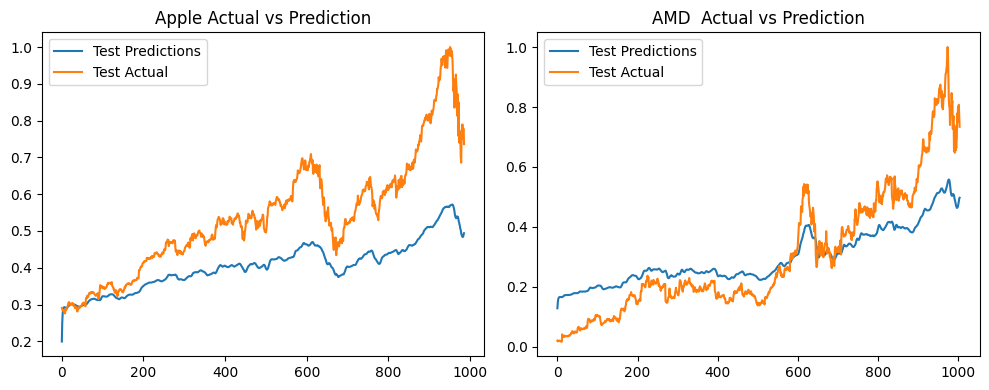

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(test_predictions_apl)
ax1.plot(yapl_test)
ax1.set_title('Apple Actual vs Prediction')
ax1.legend(['Test Predictions', 'Test Actual'])

ax2.plot(test_predictions_amd)
ax2.plot(yamd_test)
ax2.set_title('AMD  Actual vs Prediction')
ax2.legend(['Test Predictions', 'Test Actual'])

plt.tight_layout()
plt.show()

Berdasarkan plot diatas bisa terlihat bahwa nilai prediksi yang dihasilkan model baseline masih belum sepenuhnya baik dan terkesan kurang optimal, nilai prediksi masih berada cukup jauh dari nilai aktualnya. Secara keseluruhan dari hasil performa metrics dan juga plot, arsitektur baseline ini belum cukup optimal, oleh karena itu tuning dan modifikasi terhadap arsitektur diperlukan.

## **Evaluasi Arsitektur yang telah di Tuning**

In [ ]:
X_test_apl = torch.Tensor(Xapl_test)
y_test_apl = torch.Tensor(yapl_test)

modelTune.eval()
test_predictions_tensor_apl = modelTune(X_test_apl)

y_pred = test_predictions_tensor_apl.detach().numpy()
y_test = y_test_apl.numpy()

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE Apple:", rmse.item())
print("MAE Apple:", mae.item())
print("MAPE Apple:", mape.item())

RMSE Apple: 0.012279100716114044
MAE Apple: 0.007397714536637068
MAPE Apple: 1.3169129379093647


In [ ]:
X_test_amd = torch.Tensor(Xamd_test)
y_test_amd = torch.Tensor(yamd_test)

modelTune.eval()
test_predictions_tensor_amd = modelTune(X_test_amd)

y_pred = test_predictions_tensor_amd.detach().numpy()
y_test = y_test_amd.numpy()

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE AMD:", rmse.item())
print("MAE AMD:", mae.item())
print("MAPE AMD:", mape.item())

RMSE AMD: 0.01561425905674696
MAE AMD: 0.009223828092217445
MAPE AMD: 3.41542549431324


Secara keseluruhan arsitektur yang telah di tuning memberikan performa yang sangat baik ketika diterapkan pada kedua dataset test ini.



*   Hasil RMSE yang didapat dari kedua dataset berada pada rentan nilai 0.012(Apple) dan 0.015(AMD). Pada model ini, nilai RMSE yang sangat rendah menunjukkan bahwa model memiliki tingkat kesalahan yang sangat kecil dalam memprediksi nilai-nilai. Dengan kata lain, prediksi model sangat dekat dengan nilai aktual.
*   Hasil RMSE yang didapat dari kedua dataset berada pada rentan nilai 0.007(Apple) dan 0.009(AMD). Pada model ini,  nilai MAE yang sangat rendah menunjukkan bahwa model memiliki kesalahan yang sangat kecil dalam memprediksi nilai-nilai. Dengan kata lain, selisih antara prediksi dan nilai aktual sangat kecil.
*   Hasil MAPE yang didapat dari kedua dataset berada pada rentan nilai 1.3(Apple) dan 3.4(AMD). Pada model ini, nilai MAPE yang sangat rendah menunjukkan bahwa kesalahan prediksi dalam persentase juga sangat kecil. Hal ini menunjukkan bahwa prediksi model sangat dekat dengan nilai aktual dan memiliki tingkat kesalahan yang sangat rendah dalam memprediksi pergerakan harga saham dari kedua dataset.

Secara keseluruhan, hasil yang diberikan menunjukkan bahwa model yang telah di tuning ini memiliki tingkat kesalahan yang sangat rendah dan akurat ketika diterapkan pada kedua dataset tersebut serta menandakan bahwa model tersebut dapat memberikan prediksi yang sangat dekat dengan nilai aktual, sehingga dapat digunakan dengan kepercayaan tinggi dalam menginformasikan keputusan atau strategi terkait dengan prediksi saham.

In [ ]:
X_test_apl = torch.Tensor(Xapl_test)
y_test_apl = torch.Tensor(yapl_test)

test_predictions_tensor_apl = modelTune(X_test_apl).flatten()

test_predictions_apl = test_predictions_tensor_apl.detach().numpy()
yapl_test = y_test_apl.numpy()

X_test_amd = torch.Tensor(Xamd_test)
y_test_amd = torch.Tensor(yamd_test)

test_predictions_tensor_amd = modelTune(X_test_amd).flatten()

test_predictions_amd = test_predictions_tensor_amd.detach().numpy()
yamd_test = y_test_amd.numpy()

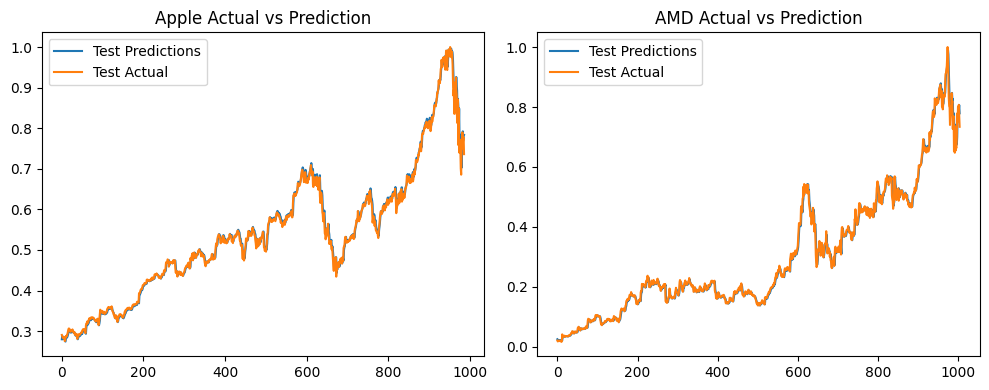

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(test_predictions_apl)
ax1.plot(yapl_test)
ax1.set_title('Apple Actual vs Prediction')
ax1.legend(['Test Predictions', 'Test Actual'])

ax2.plot(test_predictions_amd)
ax2.plot(yamd_test)
ax2.set_title('AMD Actual vs Prediction')
ax2.legend(['Test Predictions', 'Test Actual'])

plt.tight_layout()
plt.show()

Secara keseluruhan berdasarkan hasil evaluasi RMSE, MAE dan MAPE serta plot perbandignan antara nilai prediksi dan nilai aktual dengan menggunakan testing set menunjukan hasil yang sangat baik. Baik dataset Apple maupun AMD dapat memberikan hasil yang akurat dan minim kesalahan. Hal ini menandakan bahwa tuning yang dilakukan pada model ini sudah optimal dan effisien